#Aldiansyah Satrio Kabisat

Dataset dapat diakses pada link berikut:

https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting (Location 1)

#Data Loading

In [ ]:
from google.colab import files

files.upload()

Saving Location1.csv to Location1.csv


{'Location1.csv': b'Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power\r\n2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635\r\n2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424\r\n2017-01-02 02:00:00,26.8,91,24.5,1.3,2.78,148,150,3.2,0.1214\r\n2017-01-02 03:00:00,27.4,88,24.3,1.3,2.69,58,105,1.6,0.1003\r\n2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4,0.0793\r\n2017-01-02 05:00:00,27.6,90,25.2,2.73,5.59,66,80,4.5,0.0778\r\n2017-01-02 06:00:00,26.7,92,24.9,2.1,5.82,65,78,4.7,0.0959\r\n2017-01-02 07:00:00,28.4,91,26.1,3.1,6.24,69,78,4.8,0.1141\r\n2017-01-02 08:00:00,30.2,88,27,3.54,6.89,74,81,5.8,0.1322\r\n2017-01-02 09:00:00,34,82,29.1,3.44,6.01,82,86,6.5,0.1503\r\n2017-01-02 10:00:00,35.6,73,27.7,3.71,5.32,93,95,8,0.1684\r\n2017-01-02 11:00:00,36.2,69,27,3.22,4.65,97,99,8.1,0.1866\r\n2017-01-02 12:00:00,36.2,71,27.6,3.22,4.55,97,99,7.5,0.2066\r\n2017-01-02 13:00:00,35.9,73

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Location1.csv')

df.head(10)

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            28.5                   85         24.5   
1  2017-01-02 01:00:00            28.4                   86         24.7   
2  2017-01-02 02:00:00            26.8                   91         24.5   
3  2017-01-02 03:00:00            27.4                   88         24.3   
4  2017-01-02 04:00:00            27.3                   88         24.1   
5  2017-01-02 05:00:00            27.6                   90         25.2   
6  2017-01-02 06:00:00            26.7                   92         24.9   
7  2017-01-02 07:00:00            28.4                   91         26.1   
8  2017-01-02 08:00:00            30.2                   88         27.0   
9  2017-01-02 09:00:00            34.0                   82         29.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   
5           2.73            5.59                 66                  80   
6           2.10            5.82                 65                  78   
7           3.10            6.24                 69                  78   
8           3.54            6.89                 74                  81   
9           3.44            6.01                 82                  86   

   windgusts_10m   Power  
0            1.4  0.1635  
1            4.4  0.1424  
2            3.2  0.1214  
3            1.6  0.1003  
4            4.0  0.0793  
5            4.5  0.0778  
6            4.7  0.0959  
7            4.8  0.1141  
8            5.8  0.1322  
9            6.5  0.1503

#Data Analysis and Preprocessing

In [ ]:
print(len(df))

# 43800 data sample

43800


In [ ]:
# Check for missing datapoint

df['Time'] = pd.to_datetime(df['Time'])

earliest_datetime = df['Time'].min()
latest_datetime = df['Time'].max()

datetime_range = pd.date_range(start=earliest_datetime, end=latest_datetime, freq='H')

missing_datetimes = datetime_range[~datetime_range.isin(df['Time'])]

print("Missing datetimes:")
print(missing_datetimes)

# No missing datapoint

Missing datetimes:
DatetimeIndex([], dtype='datetime64[ns]', freq='H')


In [ ]:
print(df.isnull().sum())

# No missing data

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64


In [ ]:
df.describe().transpose()

count        mean        std   min       25%  \
temperature_2m       43800.0   47.862911  19.453691 -14.4   32.1000   
relativehumidity_2m  43800.0   72.288744  16.852287  18.0   60.0000   
dewpoint_2m          43800.0   38.569308  18.772110 -17.1   24.3000   
windspeed_10m        43800.0    3.591147   1.649318   0.0    2.4100   
windspeed_100m       43800.0    6.284431   2.685216   0.1    4.3800   
winddirection_10m    43800.0  203.637329  96.371262   1.0  132.0000   
winddirection_100m   43800.0  203.343676  97.959852   0.0  130.0000   
windgusts_10m        43800.0    7.771795   3.569147   0.5    5.0000   
Power                43800.0    0.405385   0.288322   0.0    0.1489   

                           50%       75%       max  
temperature_2m        47.30000   64.5000   94.1000  
relativehumidity_2m   74.00000   86.0000  100.0000  
dewpoint_2m           38.10000   54.7000   76.3000  
windspeed_10m          3.30000    4.5900   13.4500  
windspeed_100m         6.08000    7.9900   20.6500  
winddirection_10m    225.00000  277.0000  360.0000  
winddirection_100m   226.00000  278.0000  360.0000  
windgusts_10m          7.20000   10.0000   29.2000  
Power                  0.34765    0.6596    0.9913

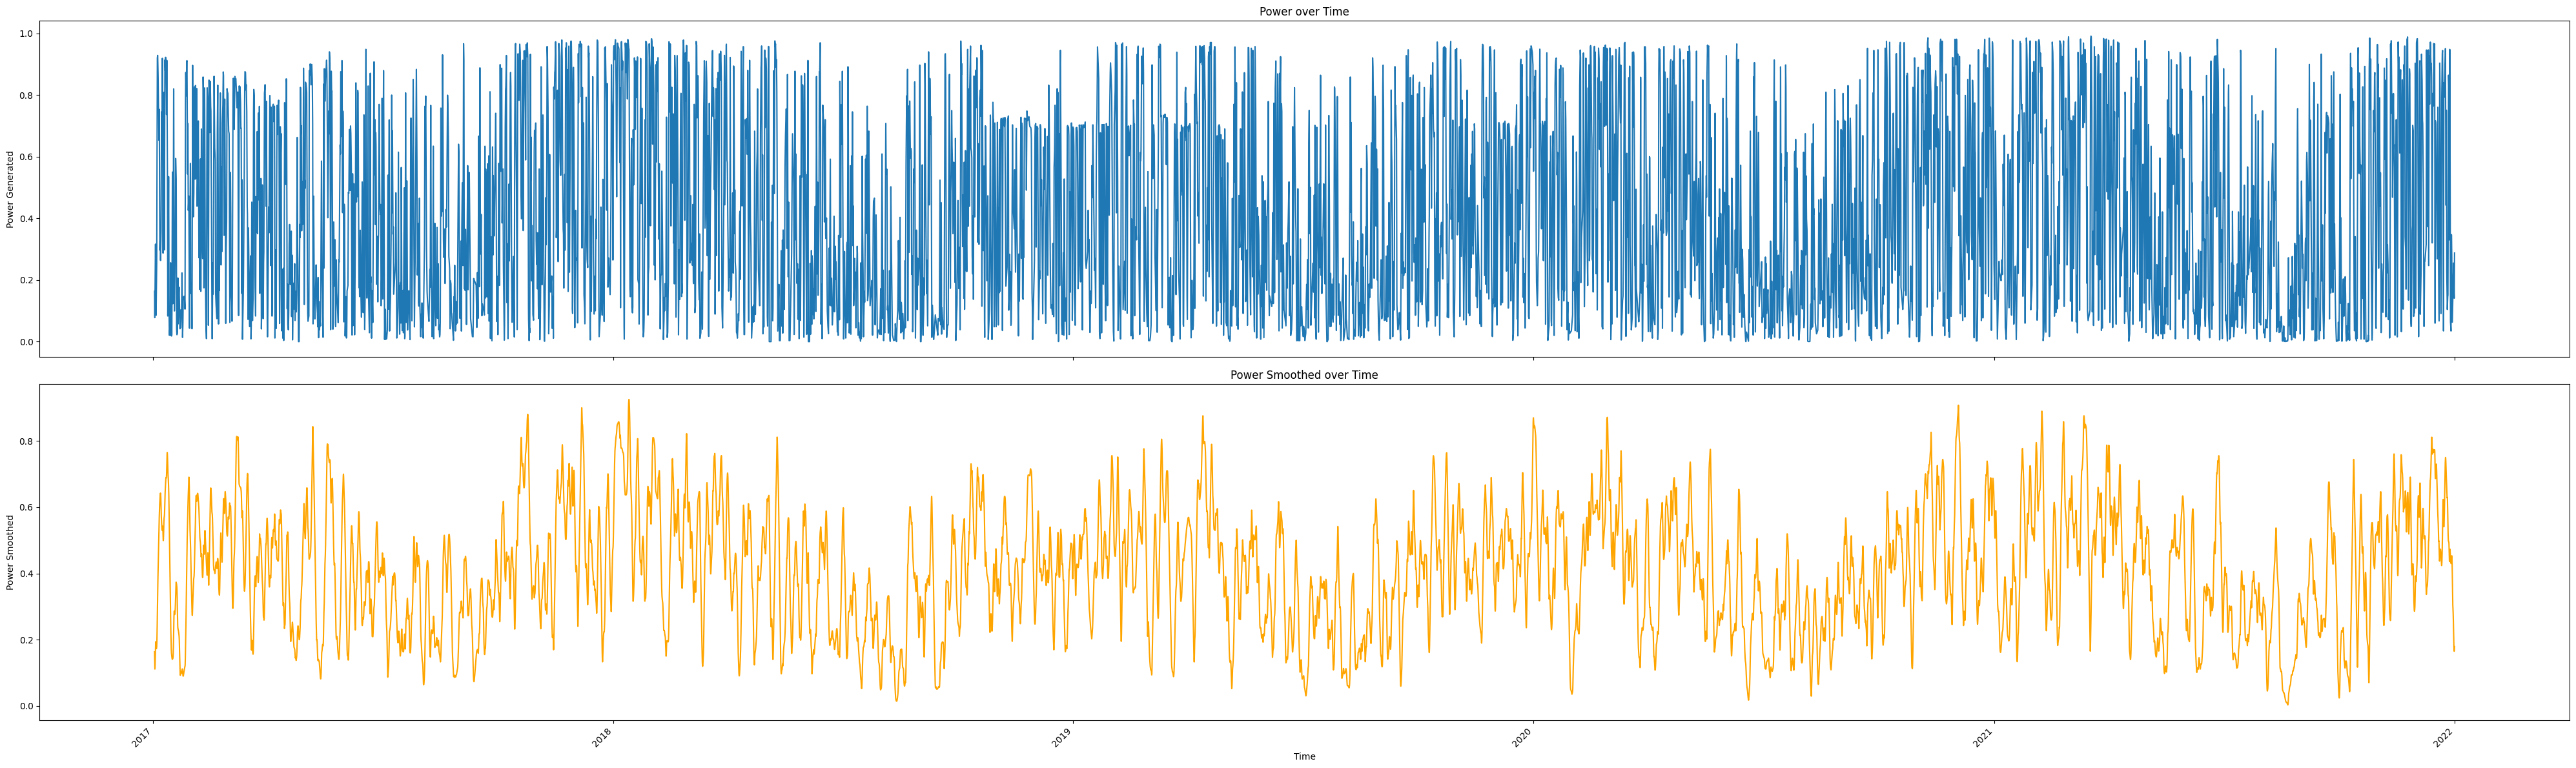

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Power_smoothed'] = df['Power'].rolling(window=72, min_periods=1).mean()

# Create a scatter plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(40, 12), sharex=True)

# Plot the original 'Power' data
sns.lineplot(x='Time', y='Power', data=df, ax=axes[0])
axes[0].set_title('Power over Time')
axes[0].set_ylabel('Power Generated')

# Plot the smoothed 'Power_smoothed' data
sns.lineplot(x='Time', y='Power_smoothed', data=df, ax=axes[1], color='orange')
axes[1].set_title('Power Smoothed over Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Power Smoothed')

# Format x-axis to show both date and time
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Data seems to show periodic tendencies with peak on the beginning/end of a year and a dips on the midyear on a year scale

<ipython-input-8-d9961999cb0e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Power_smoothed'] = subset_df['Power'].rolling(window=3, min_periods=1).mean()


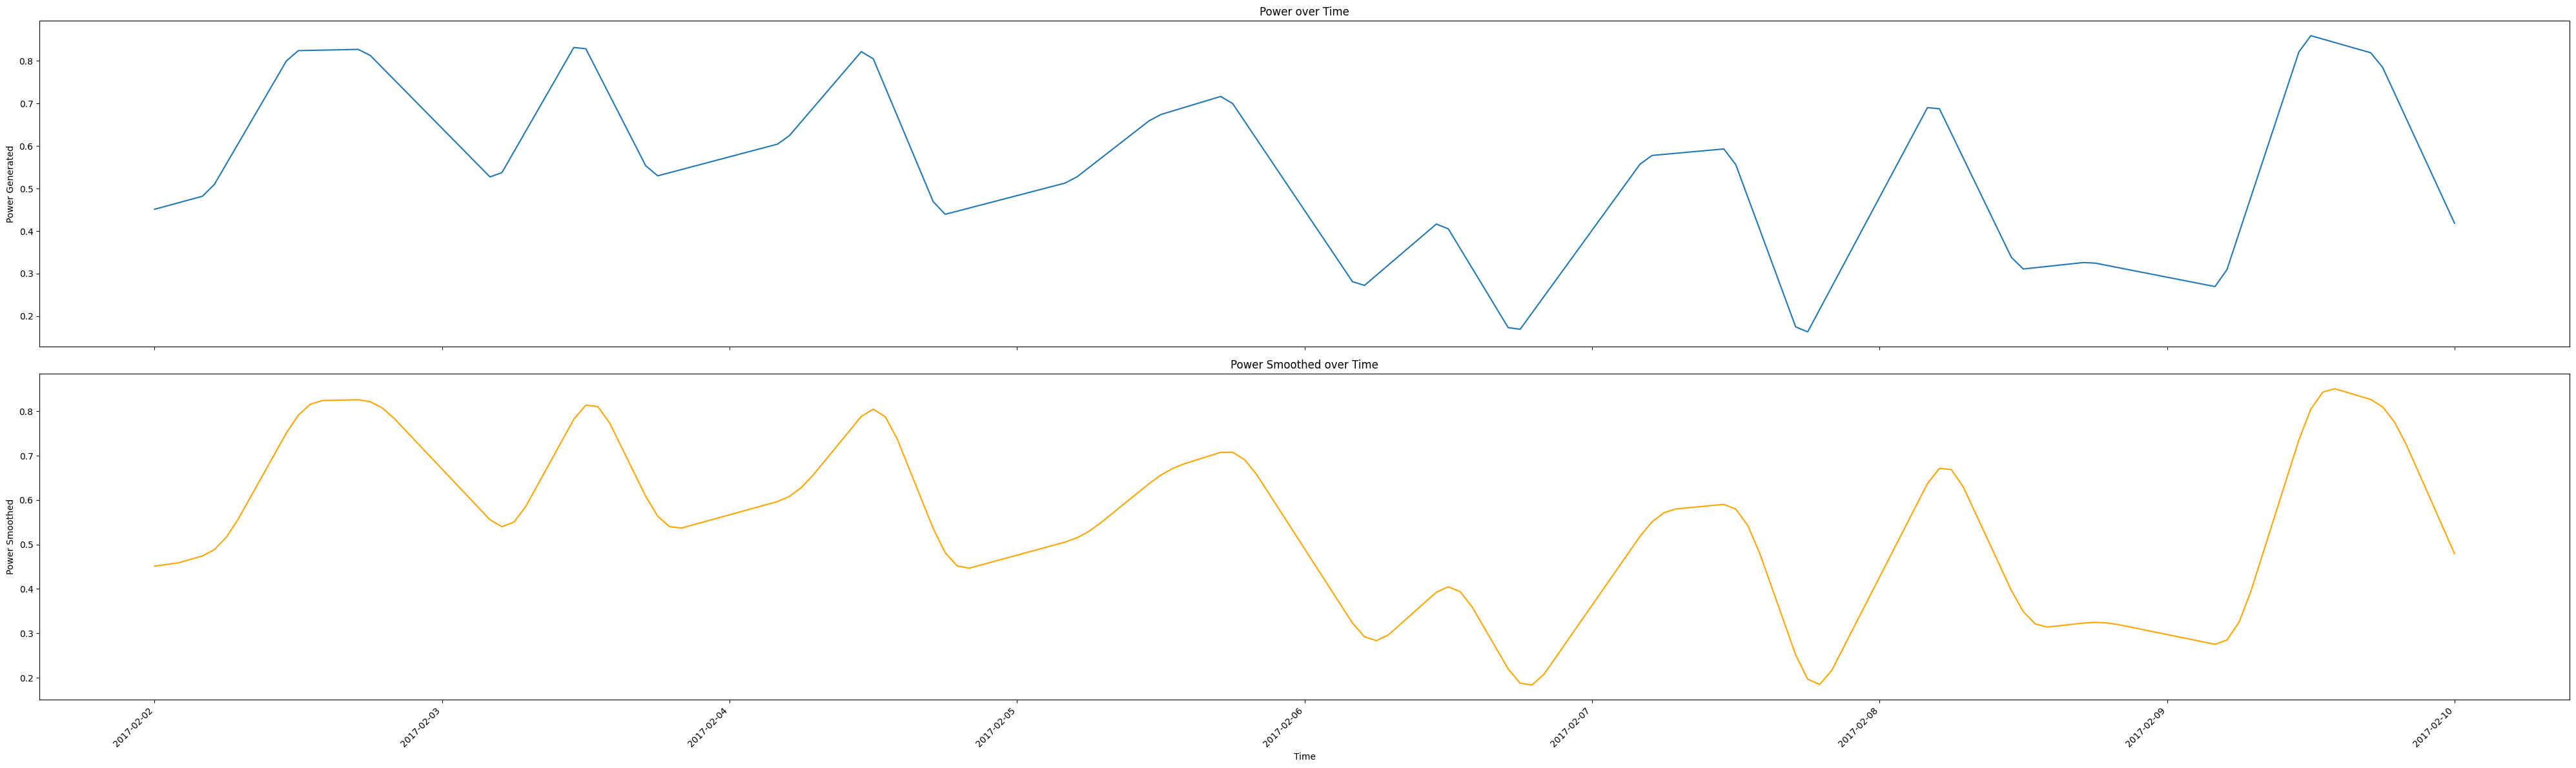

In [ ]:
# Specify the date range you want to slice
start_date = pd.to_datetime('2017-02-02')
end_date = pd.to_datetime('2017-02-10')

# Use boolean indexing to slice the data for the specified date range
subset_df = df.loc[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

subset_df['Power_smoothed'] = subset_df['Power'].rolling(window=3, min_periods=1).mean()

# Create a scatter plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(40, 12), sharex=True)

# Plot the original 'Power' data
sns.lineplot(x='Time', y='Power', data=subset_df, ax=axes[0])
axes[0].set_title('Power over Time')
axes[0].set_ylabel('Power Generated')

# Plot the smoothed 'Power_smoothed' data
sns.lineplot(x='Time', y='Power_smoothed', data=subset_df, ax=axes[1], color='orange')
axes[1].set_title('Power Smoothed over Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Power Smoothed')

# Format x-axis to show both date and time
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Data seems to show a similiar pattern of power generation on a scale of a day, albeit with more variation

In [ ]:
series = df['Power']

# Splitting data into Train and Test (No normalization needed, already normalized using specification of the generator)

train_percentage = 0.8

split_index = int(len(series) * train_percentage)

# Split the series into training and testing sets
train_series = series[:split_index]
test_series = series[split_index:]

# Print the lengths of the training and testing sets
print("Training set length:", len(train_series))
print("Testing set length:", len(test_series))

Training set length: 35040
Testing set length: 8760


In [ ]:
# Dataset windowing

import tensorflow as tf

def window_dataset(data_series, window_size, batch_size, shuffle_buffer):
    data_series = tf.expand_dims(data_series, axis=-1)

    dataset = tf.data.Dataset.from_tensor_slices(data_series)

    windows = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    flat_windows = windows.flat_map(lambda window: window.batch(window_size + 1))

    shuffled_windows = flat_windows.shuffle(shuffle_buffer)

    mapped_windows = shuffled_windows.map(lambda window: (window[:-1], window[-1:]))

    batched_dataset = mapped_windows.batch(batch_size).prefetch(1)

    return batched_dataset

In [ ]:
windowed_train_series = window_dataset(train_series, window_size=24, batch_size=50, shuffle_buffer=1000)
windowed_test_series = window_dataset(test_series, window_size=24, batch_size=50, shuffle_buffer=1000)

# Model Compilation and Training

In [ ]:
# Callback for EarlyStopping based on patience and targeted accuracy

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

class TargetAccuracy(Callback):
    def __init__(self, target_acc):
        super(TargetAccuracy, self).__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        current_train_metric = logs.get('mae')
        current_val_metric = logs.get('val_mae')

        if current_train_metric < self.target_acc and current_val_metric < self.target_acc:
            print(f"\nTarget training and validation metric ({self.target_acc}) reached. Stopping training.")
            self.model.stop_training = True

target_metric = TargetAccuracy(.1)

In [ ]:
# Model architecture with 2 LSTM layer, 1 Dense w/ SiLU activation, and L2 Kernel regularizer

regularizer = tf.keras.regularizers.l2(0.01)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(24, return_sequences=True, kernel_regularizer=regularizer),
  tf.keras.layers.LSTM(24, kernel_regularizer=regularizer),
  tf.keras.layers.Dense(10, activation="swish", kernel_regularizer=regularizer),
  tf.keras.layers.Dense(1),
])

In [ ]:
# Train the model

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.AdamW(learni  ng_rate=1e-3, weight_decay=2e-6),
              metrics=["mae"],
              )

history = model.fit(windowed_train_series,
                    epochs=20,
                    validation_data=windowed_test_series,
                    callbacks=[target_metric, early_stopping])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val Loss'], loc='upper left')
plt.show()

# Graph showed no sign of overfitting

NameError: name 'plt' is not defined

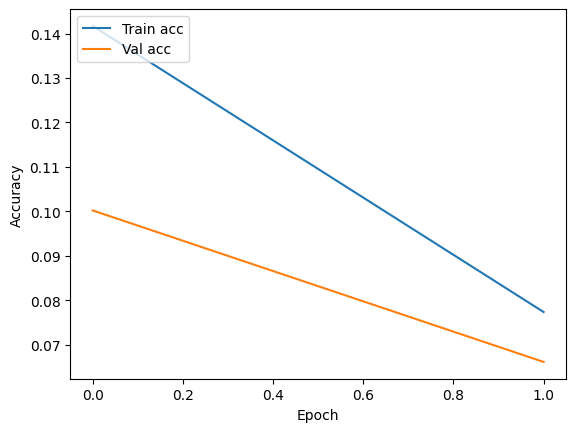

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Val acc'], loc='upper left')
plt.show()

# Graph showed sign of accuracy convergence and good generalization performance

In [ ]:
predictions = model.predict(windowed_test_series)

predictions = predictions.flatten()

print(predictions)

175/175 [==============================] - 2s 6ms/step
[0.11621012 0.8792606  0.51984876 ... 0.06874218 0.79046065 0.7029231 ]


In [ ]:
actual_values = np.array([value[0, 0] for batch in windowed_test_series for value in batch[1].numpy()])

print(actual_values)

[0.9711 0.9686 0.039  ... 0.1263 0.1849 0.9024]


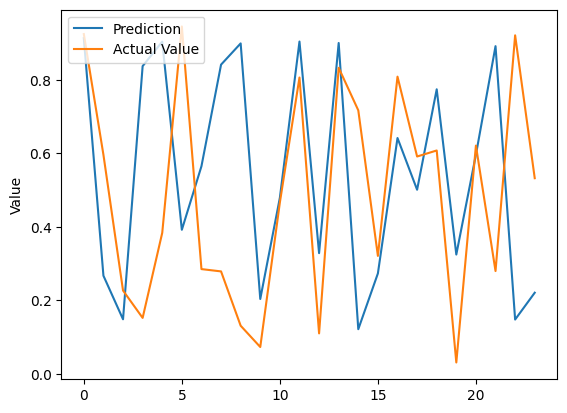

In [ ]:
predictions_plot = predictions[1100:1124]
values_plot = actual_values[1100:1124]

plt.plot(predictions_plot)
plt.plot(values_plot)
plt.ylabel('Value')
plt.xlabel('')
plt.legend(['Prediction', 'Actual Value'], loc='upper left')
plt.show()

# Graph showed model can generally predict the trend of power generation quite accurately albeit with some overshoot/undershoot and lag (also present on the daily pattern)

In [ ]:
model.save('./trained-ts')

In [ ]:
!zip -r trained-ts.zip ./trained-ts

  adding: trained-ts/ (stored 0%)
  adding: trained-ts/assets/ (stored 0%)
  adding: trained-ts/fingerprint.pb (stored 0%)
  adding: trained-ts/variables/ (stored 0%)
  adding: trained-ts/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: trained-ts/variables/variables.index (deflated 63%)
  adding: trained-ts/saved_model.pb (deflated 90%)
  adding: trained-ts/keras_metadata.pb (deflated 90%)
